<a href="https://colab.research.google.com/github/sheikhyounus123/module2-solution/blob/main/useCNN9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

# Mount Google Drive to access the saved model
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import tensorflow as tf

# Path to the saved model in Google Drive
model_path = '/content/drive/MyDrive/pneumoconiosis_cnn_best_model.keras'

# Load the saved model
model = tf.keras.models.load_model(model_path)

# Confirm the model is loaded by printing the model summary
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       4,735,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,485,445 (55.26 MB)

 Trainable params: 4,828,481 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 9,656,964 (36.84 MB)

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Function to preprocess the image and make predictions
def predict_image(img_path):
    # Load the image with the same target size used during model training
    img = image.load_img(img_path, target_size=(150, 150))

    # Convert the image to an array
    img_tensor = image.img_to_array(img)

    # Expand the dimensions of the image to match the model's input shape (1, 150, 150, 3)
    img_tensor = np.expand_dims(img_tensor, axis=0)

    # Normalize the pixel values to the range [0, 1]
    img_tensor /= 255.0

    # Make prediction using the loaded model
    prediction = model.predict(img_tensor)

    # Interpret the prediction
    if prediction[0] > 0.5:
        print("Predicted: Infected")
    else:
        print("Predicted: Non-Infected")

# Example usage: Provide the path to an image you want to classify
predict_image('/content/drive/MyDrive/images_medium_g06ja15g7a.jpeg')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step
Predicted: Non-Infected


In [ ]:
predict_image('/content/drive/MyDrive/images_medium_g06ja15g7a.jpeg')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
Predicted: Non-Infected


In [ ]:
import os
import numpy as np
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image


In [ ]:
infected_folder = '/content/drive/MyDrive/data and models/data/chest/Chest_infected'
non_infected_folder = '/content/drive/MyDrive/data and models/data/chest/Chest_Noninfected'
img_size = (150, 150)  # Size of the images expected by the model


In [ ]:
# Function to load images from a folder and assign labels
def load_images_from_folder(folder, label, img_size):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = image.load_img(img_path, target_size=img_size)
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0) / 255.0  # Normalize the image

        images.append(img_array)
        labels.append(label)

    return images, labels

# Load infected images (label = 1)
infected_images, infected_labels = load_images_from_folder(infected_folder, 1, img_size)

# Load non-infected images (label = 0)
non_infected_images, non_infected_labels = load_images_from_folder(non_infected_folder, 0, img_size)


In [ ]:
# Combine the loaded images and labels
all_images = infected_images + non_infected_images
all_labels = infected_labels + non_infected_labels

# Convert to NumPy arrays
X = np.vstack(all_images)  # Stack the images
y_true = np.array(all_labels)  # True labels


In [ ]:
# Load the saved model
model_path = '/content/drive/MyDrive/pneumoconiosis_cnn_best_model.keras'
model = tf.keras.models.load_model(model_path)

# Predict using the model
y_pred = model.predict(X)

# Convert predicted probabilities to binary labels (0 or 1)
y_pred = [1 if pred > 0.5 else 0 for pred in y_pred]


30/30 ━━━━━━━━━━━━━━━━━━━━ 16s 536ms/step


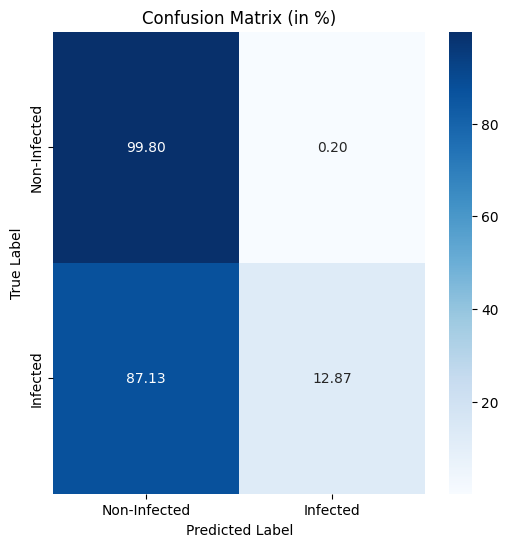

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the confusion matrix (absolute values)
conf_matrix = confusion_matrix(y_true, y_pred)

# Normalize the confusion matrix to get percentages
conf_matrix_normalized = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis] * 100

# Plot the confusion matrix using seaborn
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix_normalized, annot=True, fmt=".2f", cmap="Blues",
            xticklabels=['Non-Infected', 'Infected'],
            yticklabels=['Non-Infected', 'Infected'])

plt.title("Confusion Matrix (in %)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


NameError: name 'history' is not defined

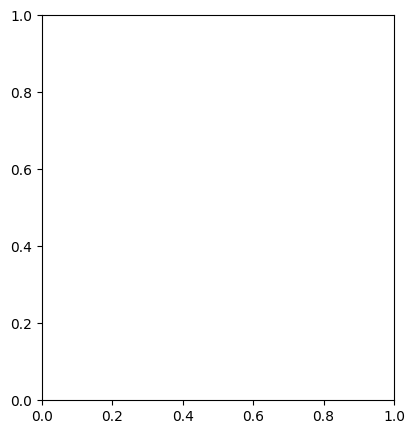

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have the training history stored in a variable called 'history'
# This is usually obtained when you train the model using model.fit()
# For example:
# history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

# Plot training & validation accuracy values
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()